In [1]:
# pull in dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

import seaborn as sns

In [2]:
# read in csv files
annual_hours = pd.read_csv('Data/Working_hours/clean_annual_hours.csv')
gdp = pd.read_csv('Data/Working_hours/clean_gdp.csv')
home_hours = pd.read_csv('Data/Working_hours/clean_home_hours.csv')
productivity = pd.read_csv('Data/Working_hours/clean_productivity.csv')
hours_weekly = pd.read_csv('Data/Working_hours/clean_weekly_hours.csv')

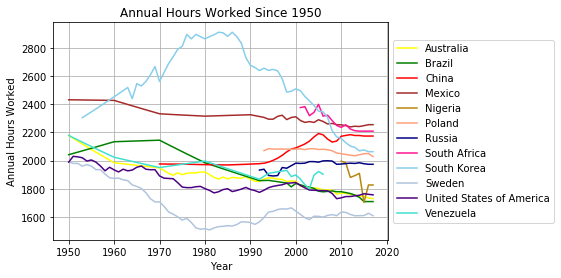

In [3]:
# line graph of hours worked per nation over time
aus_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='AUS']['Year'],annual_hours.loc[annual_hours['Code']=='AUS']['Average annual hours worked by persons engaged (hours per person engaged)'],color="yellow",label="Australia")
bra_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='BRA']['Year'],annual_hours.loc[annual_hours['Code']=='BRA']['Average annual hours worked by persons engaged (hours per person engaged)'],color="green",label="Brazil")
chn_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='CHN']['Year'],annual_hours.loc[annual_hours['Code']=='CHN']['Average annual hours worked by persons engaged (hours per person engaged)'],color="red",label="China")
mex_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='MEX']['Year'],annual_hours.loc[annual_hours['Code']=='MEX']['Average annual hours worked by persons engaged (hours per person engaged)'],color="brown",label="Mexico")
nga_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='NGA']['Year'],annual_hours.loc[annual_hours['Code']=='NGA']['Average annual hours worked by persons engaged (hours per person engaged)'],color="darkgoldenrod",label="Nigeria")
pol_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='POL']['Year'],annual_hours.loc[annual_hours['Code']=='POL']['Average annual hours worked by persons engaged (hours per person engaged)'],color="lightsalmon",label="Poland")
rus_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='RUS']['Year'],annual_hours.loc[annual_hours['Code']=='RUS']['Average annual hours worked by persons engaged (hours per person engaged)'],color="navy",label="Russia")
zaf_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='ZAF']['Year'],annual_hours.loc[annual_hours['Code']=='ZAF']['Average annual hours worked by persons engaged (hours per person engaged)'],color="deeppink",label="South Africa")
kor_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='KOR']['Year'],annual_hours.loc[annual_hours['Code']=='KOR']['Average annual hours worked by persons engaged (hours per person engaged)'],color="skyblue",label="South Korea")
swe_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='SWE']['Year'],annual_hours.loc[annual_hours['Code']=='SWE']['Average annual hours worked by persons engaged (hours per person engaged)'],color="lightsteelblue",label="Sweden")
usa_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='USA']['Year'],annual_hours.loc[annual_hours['Code']=='USA']['Average annual hours worked by persons engaged (hours per person engaged)'],color="indigo",label="United States of America")
ven_handle,=plt.plot(annual_hours.loc[annual_hours['Code']=='VEN']['Year'],annual_hours.loc[annual_hours['Code']=='VEN']['Average annual hours worked by persons engaged (hours per person engaged)'],color="turquoise",label="Venezuela")
# titles and labels
plt.title("Annual Hours Worked Since 1950")
plt.xlabel("Year")
plt.ylabel("Annual Hours Worked")
# places legend outside plot
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.grid()
plt.show()

In [4]:
# some additional data cleaning for the gdp data
# deletes nonsense columns
del gdp['Unnamed: 0']
del gdp['Unnamed: 5']
# filters only to columns with non zero values
gdp_df = gdp.loc[gdp['Working hours (hours per person engaged)']!=0.0000,:]
gdp_df = gdp_df.loc[gdp_df['GDP per capita (int.-$) (constant 2011 international $)']!=0.0000,:]
gdp_df

,Entity,Code,Year,Working hours (hours per person engaged),GDP per capita (int.-$) (constant 2011 international $)
40,Australia,AUS,1990.0,1867.9515,28658.36589
41,Australia,AUS,1991.0,1853.8984,28185.75290
42,Australia,AUS,1992.0,1851.8408,27969.06612
43,Australia,AUS,1993.0,1869.6207,28815.46298
44,Australia,AUS,1994.0,1877.7278,29646.41927
...,...,...,...,...,...
822,Venezuela,VEN,2002.0,1829.0203,13090.59206
823,Venezuela,VEN,2003.0,1801.2109,11860.73286
824,Venezuela,VEN,2004.0,1896.6949,13785.21822
825,Venezuela,VEN,2005.0,1922.8501,14948.12511


The r-squared is: -0.5168041886269452


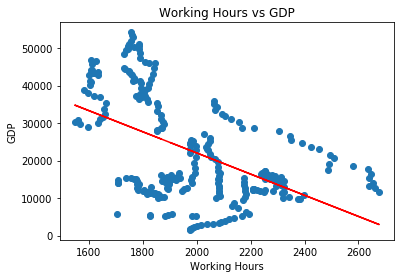

In [5]:
# scatter and linregression for working hours vs gdp
# x and y values
x_values = gdp_df['Working hours (hours per person engaged)']
y_values = gdp_df['GDP per capita (int.-$) (constant 2011 international $)']
# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# build plot
plt.scatter(x_values,y_values) 
# add linear regression line and annotate equation
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(2000,50000),fontsize=15,color="red")
# add titles and labels
plt.xlabel('Working Hours')
plt.ylabel('GDP')
plt.title('Working Hours vs GDP')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.532428290727606


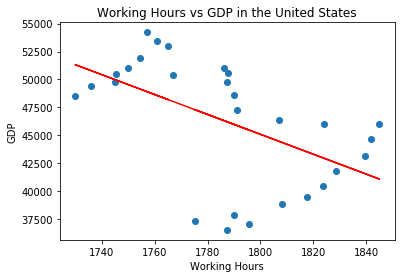

In [6]:
# scatter and linregression for working hours vs gdp (US only)
# x and y values
x_values = gdp_df.loc[gdp_df['Code']=='USA']['Working hours (hours per person engaged)']
y_values = gdp_df.loc[gdp_df['Code']=='USA']['GDP per capita (int.-$) (constant 2011 international $)']
# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# build plot
plt.scatter(x_values,y_values) 
# add linear regression line and annotate equation
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-0.12,300),fontsize=15,color="red")
# add titles and labels
plt.xlabel('Working Hours')
plt.ylabel('GDP')
plt.title('Working Hours vs GDP in the United States')
print(f"The r-squared is: {rvalue}")
plt.show()

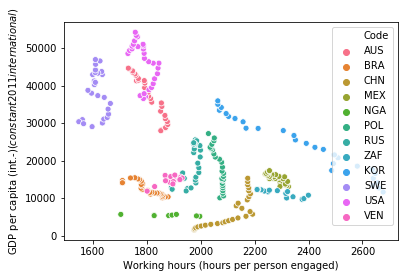

In [7]:
sns.scatterplot(data=gdp_df, x='Working hours (hours per person engaged)', y='GDP per capita (int.-$) (constant 2011 international $)', hue='Code')

In [8]:
# prelim work on home hours, decided not to include in final analysis
# home_hours_1950 = home_hours.loc[home_hours['Year']==1950,:]
# plt.pie()

In [9]:
# some additional data cleaning for the productivity data
# deletes nonsense columns
del productivity['Unnamed: 0']
del productivity['Unnamed: 5']
# filters only to columns with non zero values
productivity_df = productivity.loc[productivity['Work hours per persons engaged']!=0.0000,:]
productivity_df = productivity_df.loc[productivity_df['Productivity']!=0.0000,:]
productivity_df

,Entity,Code,Year,Work hours per persons engaged,Productivity
0,Australia,AUS,1950.0,2178.2456,13.322768
1,Australia,AUS,1951.0,2158.1013,12.820562
2,Australia,AUS,1952.0,2138.1436,12.497678
3,Australia,AUS,1953.0,2118.3701,14.030227
4,Australia,AUS,1954.0,2098.7798,14.992547
...,...,...,...,...,...
822,Venezuela,VEN,2002.0,1829.0203,9.460864
823,Venezuela,VEN,2003.0,1801.2109,9.292365
824,Venezuela,VEN,2004.0,1896.6949,10.846614
825,Venezuela,VEN,2005.0,1922.8501,13.346090


The r-squared is: -0.5347975784820365


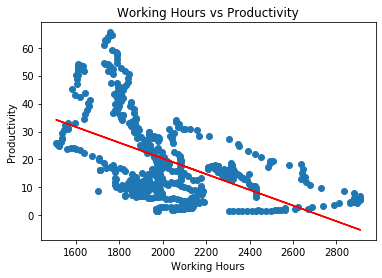

In [10]:
# scatter and linregression for working hours vs productivity
# x and y values
x_values = productivity_df['Work hours per persons engaged']
y_values = productivity_df['Productivity']
# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# build plot
plt.scatter(x_values,y_values) 
# add linear regression line and annotate equation
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-0.12,300),fontsize=15,color="red")
# add titles and labels
plt.xlabel('Working Hours')
plt.ylabel('Productivity')
plt.title('Working Hours vs Productivity')
print(f"The r-squared is: {rvalue}")
plt.show()

The r-squared is: -0.857193488287771


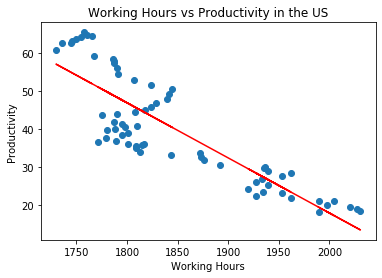

<Figure size 9000x9000 with 0 Axes>

In [11]:
# scatter and linregression for working hours vs productivity (US only)
# x and y values
x_values = productivity_df.loc[productivity_df['Code']=='USA']['Work hours per persons engaged']
y_values = productivity_df.loc[productivity_df['Code']=='USA']['Productivity']
# linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# build linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# build plot
plt.scatter(x_values,y_values) 
# add linear regression line and annotate equation
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(-0.12,300),fontsize=15,color="red")
# add titles and labels
plt.xlabel('Working Hours')
plt.ylabel('Productivity')
plt.title('Working Hours vs Productivity in the US')
print(f"The r-squared is: {rvalue}")
plt.figure(figsize=(30, 30), dpi= 300, facecolor='w', edgecolor='k')
plt.show()

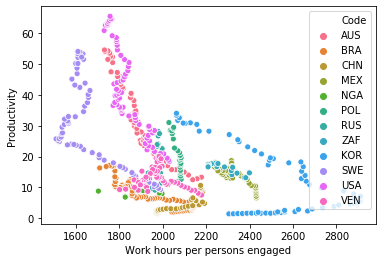

In [12]:
sns.scatterplot(data=productivity_df, x='Work hours per persons engaged', y='Productivity', hue='Code')